In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt

In [2]:
df1 = pd.read_csv('zhao1.csv') # 读文件
df2 = pd.read_excel('数据修正滤波后的2.xlsx') # 读文件
df3 = pd.read_excel('数据修正滤波后的3.xlsx') # 读文件

In [3]:
# 时间戳当索引
df1.index = pd.to_datetime(df1['时间'],format='%Y/%m/%d %H:%M:%S') 
df2.index = pd.to_datetime(df2['时间'],format='%Y/%m/%d %H:%M:%S') 
df3.index = pd.to_datetime(df3['时间'],format='%Y/%m/%d %H:%M:%S') 

In [4]:
df1 = df1.drop('时间',axis=1)
df2 = df2.drop('时间',axis=1)
df3 = df3.drop('时间',axis=1)

In [5]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

In [6]:
# 数据预处理2
list = []
for i in range(len(df1['GPS车速'])-1):
    if df1['GPS车速'][i+1] > df1['GPS车速'][i] :
        if (df1['GPS车速'][i+1] - df1['GPS车速'][i] > 14.28) :
            list.append(i)
    elif df1['GPS车速'][i+1] < df1['GPS车速'][i] :
        if (df1['GPS车速'][i+1] - df1['GPS车速'][i] <= -28.8) or (df1['GPS车速'][i+1] - df1['GPS车速'][i] >= -27):
            list.append(i)
df1= df1.drop(list)
df1

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,2017-12-18 13:42:13,0.000000,0.000000,-0.396000,-0.900000,119.367781,25.992420,775.000000,18.0,58.02,0.000000,0.146500,22.0,2.30
1,2017-12-18 13:42:14,0.000000,0.000000,-0.378000,-0.882000,119.367783,25.992418,775.000000,17.0,60.30,0.000000,0.146500,21.0,2.39
2,2017-12-18 13:42:15,0.000000,0.000000,-0.396000,-0.882000,119.367785,25.992416,775.000000,17.0,55.24,0.000000,0.146400,22.0,2.19
3,2017-12-18 13:42:16,0.000000,0.000000,-0.378000,-0.900000,119.367785,25.992416,762.000000,17.0,55.75,0.000000,0.147100,21.0,2.21
4,2017-12-18 13:42:17,0.000000,0.000000,-0.396000,-0.882000,119.367785,25.992416,762.000000,16.0,56.00,0.000000,0.147100,21.0,2.22
5,2017-12-18 13:42:18,0.000000,0.000000,-0.378000,-0.900000,119.367785,25.992416,787.000000,18.0,63.33,0.000000,0.147100,22.0,2.51
6,2017-12-18 13:42:19,0.000000,0.000000,-0.342000,-0.936000,119.367785,25.992416,687.000000,21.0,62.06,0.050000,0.147100,26.0,2.46
7,2017-12-18 13:42:20,1.414286,0.000000,-0.324000,-0.936000,119.367785,25.992416,900.000000,25.0,0.36,0.080000,0.147000,31.0,3.79
8,2017-12-18 13:42:21,3.709524,0.000000,-0.324000,-0.918000,119.367791,25.992408,1025.000000,25.0,0.44,0.080000,0.146700,32.0,4.51
9,2017-12-18 13:42:22,6.509524,0.000000,-0.324000,-0.936000,119.367801,25.992398,1137.000000,26.0,0.46,0.080000,0.146600,32.0,4.70


In [7]:
# 数据预处理2
list = []
for i in range(len(df2['GPS车速'])-1):
    if df2['GPS车速'][i+1] > df2['GPS车速'][i] :
        if (df2['GPS车速'][i+1] - df2['GPS车速'][i] > 14.28) :
            list.append(i)
    elif df2['GPS车速'][i+1] < df2['GPS车速'][i] :
        if (df2['GPS车速'][i+1] - df2['GPS车速'][i] <= -28.8) or (df2['GPS车速'][i+1] - df2['GPS车速'][i] >= -27):
            list.append(i)
df2= df2.drop(list)
df2

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
0,2017-11-01 19:11:50,0.000000,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,59.80,0.000,0.1466,23.0,2.37
1,2017-11-01 19:11:51,0.000000,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,54.75,0.000,0.1466,23.0,2.17
2,2017-11-01 19:11:52,0.000000,0.000,-0.468,-0.864,118.843618,25.317833,750.0,18.0,57.27,0.000,0.1466,22.0,2.27
3,2017-11-01 19:11:53,0.000000,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.78,0.000,0.1466,23.0,2.33
4,2017-11-01 19:11:54,0.000000,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,58.28,0.000,0.1471,22.0,2.31
5,2017-11-01 19:11:55,0.000000,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
6,2017-11-01 19:11:56,0.000000,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,56.77,0.000,0.1454,22.0,2.25
7,2017-11-01 19:11:57,0.000000,0.000,-0.486,-0.846,118.843618,25.317833,750.0,18.0,54.00,0.000,0.1455,23.0,2.14
8,2017-11-01 19:11:58,0.000000,0.000,-0.468,-0.846,118.843618,25.317833,750.0,18.0,55.51,0.000,0.1471,23.0,2.20
9,2017-11-01 19:11:59,0.000000,0.000,-0.468,-0.828,118.843618,25.317833,750.0,18.0,57.77,0.000,0.1471,23.0,2.29


In [8]:
# 数据预处理2
list = []
for i in range(len(df3['GPS车速'])-1):
    if df3['GPS车速'][i+1] > df3['GPS车速'][i] :
        if (df3['GPS车速'][i+1] - df3['GPS车速'][i] > 14.28) :
            list.append(i)
    elif df3['GPS车速'][i+1] < df3['GPS车速'][i] :
        if (df3['GPS车速'][i+1] - df3['GPS车速'][i] <= -28.8) or (df3['GPS车速'][i+1] - df3['GPS车速'][i] >= -27):
            list.append(i)
df3= df3.drop(list)
df3

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量,Unnamed: 14
0,2017-12-01 19:43:57,0.000000,0.270000,-0.97200,0.360000,119.430643,26.017311,787.000000,20.000000,63.840000,0.000000,0.146700,26.000000,2.530000,NaN
1,2017-12-01 19:43:58,0.000000,0.270000,-0.95400,0.342000,119.430643,26.017311,762.000000,20.000000,0.240000,0.000000,0.146800,25.000000,2.600000,NaN
2,2017-12-01 19:43:59,0.080952,0.234000,-0.95400,0.342000,119.430643,26.017311,687.000000,25.000000,0.290000,0.000000,0.146800,30.000000,3.140000,NaN
3,2017-12-01 19:44:00,0.842857,0.234000,-0.97200,0.342000,119.430643,26.017311,725.000000,26.000000,0.270000,0.000000,0.146700,33.000000,2.870000,NaN
4,2017-12-01 19:44:01,1.795238,0.252000,-0.95400,0.360000,119.430640,26.017315,662.000000,25.000000,0.270000,0.000000,0.146600,32.000000,2.920000,NaN
5,2017-12-01 19:44:02,2.752381,0.252000,-0.95400,0.342000,119.430636,26.017318,662.000000,25.000000,0.270000,0.000000,0.146600,32.000000,2.840000,NaN
13,2017-12-01 19:44:10,0.000000,0.252000,-0.95400,0.342000,119.430630,26.017348,687.000000,32.000000,0.340000,0.000000,0.146500,41.000000,3.560000,NaN
14,2017-12-01 19:44:11,0.000000,0.270000,-0.93600,0.342000,119.430630,26.017348,825.000000,27.000000,0.360000,0.000000,0.146500,34.000000,3.700000,NaN
15,2017-12-01 19:44:12,0.000000,0.270000,-0.95400,0.342000,119.430630,26.017348,825.000000,26.000000,0.320000,0.000000,0.146500,34.000000,3.350000,NaN
16,2017-12-01 19:44:13,0.000000,0.270000,-0.93600,0.360000,119.430630,26.017348,812.000000,25.000000,0.310000,0.000000,0.146500,33.000000,3.290000,NaN


In [9]:
# 数据预处理3
a = df1.loc[(df1['GPS车速']==0)&(df1['发动机转速']>500)]
list2 = a.index.tolist() #
df1 = df1.drop(list2)
df1

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
7,2017-12-18 13:42:20,1.414286,0.000000,-0.324000,-0.936000,119.367785,25.992416,900.000000,25.0,0.36,0.080000,0.147000,31.0,3.79
8,2017-12-18 13:42:21,3.709524,0.000000,-0.324000,-0.918000,119.367791,25.992408,1025.000000,25.0,0.44,0.080000,0.146700,32.0,4.51
9,2017-12-18 13:42:22,6.509524,0.000000,-0.324000,-0.936000,119.367801,25.992398,1137.000000,26.0,0.46,0.080000,0.146600,32.0,4.70
10,2017-12-18 13:42:23,9.671429,0.000000,-0.306000,-0.936000,119.367815,25.992381,1262.000000,26.0,0.54,0.085000,0.146400,31.0,5.57
15,2017-12-18 13:42:28,3.128571,0.000000,-0.378000,-0.918000,119.367881,25.992298,675.000000,23.0,61.31,0.000000,0.147100,29.0,2.43
16,2017-12-18 13:42:29,3.466667,0.000000,-0.342000,-0.936000,119.367886,25.992291,862.000000,25.0,0.34,0.055000,0.147000,31.0,3.56
17,2017-12-18 13:42:30,5.433333,0.000000,-0.360000,-0.918000,119.367895,25.992283,950.000000,22.0,0.34,0.055000,0.146600,28.0,3.61
21,2017-12-18 13:42:34,4.614286,0.000000,-0.360000,-0.918000,119.367931,25.992238,712.000000,21.0,61.82,0.000000,0.146700,28.0,2.45
22,2017-12-18 13:42:35,5.342857,0.000000,-0.360000,-0.918000,119.367940,25.992228,900.000000,24.0,0.36,0.070000,0.146600,30.0,3.81
23,2017-12-18 13:42:36,7.290476,0.000000,-0.306000,-0.918000,119.367949,25.992215,1237.000000,29.0,0.55,0.090000,0.146300,36.0,5.81


In [10]:
# 数据预处理3
a = df2.loc[(df2['GPS车速']==0)&(df2['发动机转速']>500)]
list2 = a.index.tolist() #
df2 = df2.drop(list2)
df2

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量
86,2017-11-01 19:13:16,0.100000,0.000,-0.486,-0.846,118.843618,25.317833,737.0,18.0,57.77,0.000,0.1469,23.0,2.29
87,2017-11-01 19:13:17,0.500000,0.000,-0.486,-0.828,118.843618,25.317833,750.0,18.0,55.51,0.000,0.1469,23.0,2.20
88,2017-11-01 19:13:18,1.000000,-0.054,-0.486,-0.846,118.843606,25.317780,737.0,18.0,59.53,0.000,0.1469,23.0,2.36
89,2017-11-01 19:13:19,1.400000,0.000,-0.486,-0.846,118.843618,25.317773,737.0,18.0,58.53,0.000,0.1469,23.0,2.32
90,2017-11-01 19:13:20,1.700000,0.000,-0.486,-0.846,118.843628,25.317768,737.0,18.0,56.00,0.000,0.1469,23.0,2.22
91,2017-11-01 19:13:21,1.700000,0.000,-0.468,-0.846,118.843636,25.317763,737.0,18.0,58.53,0.000,0.1468,23.0,2.32
92,2017-11-01 19:13:22,1.800000,0.000,-0.486,-0.828,118.843643,25.317760,750.0,18.0,59.53,0.000,0.1468,23.0,2.36
194,2017-11-01 19:15:04,1.000000,-0.054,-0.396,-0.846,118.843620,25.317774,987.0,23.0,0.31,0.050,0.1467,29.0,3.31
195,2017-11-01 19:15:05,2.400000,-0.072,-0.432,-0.846,118.843671,25.317711,1087.0,23.0,0.39,0.050,0.1468,28.0,4.14
196,2017-11-01 19:15:06,4.500000,-0.072,-0.432,-0.846,118.843660,25.317691,1237.0,22.0,0.44,0.060,0.1469,26.0,4.62


In [11]:
# 数据预处理3
a = df3.loc[(df3['GPS车速']==0)&(df3['发动机转速']>500)]
list2 = a.index.tolist() #
df3 = df3.drop(list2)
df3

,时间,GPS车速,X轴加速度,Y轴加速度,Z轴加速度,经度,纬度,发动机转速,扭矩百分比,瞬时油耗,油门踏板开度,空燃比,发动机负荷百分比,进气流量,Unnamed: 14
2,2017-12-01 19:43:59,0.080952,0.234000,-0.95400,0.342000,119.430643,26.017311,687.000000,25.000000,0.290000,0.000000,0.146800,30.000000,3.140000,NaN
3,2017-12-01 19:44:00,0.842857,0.234000,-0.97200,0.342000,119.430643,26.017311,725.000000,26.000000,0.270000,0.000000,0.146700,33.000000,2.870000,NaN
4,2017-12-01 19:44:01,1.795238,0.252000,-0.95400,0.360000,119.430640,26.017315,662.000000,25.000000,0.270000,0.000000,0.146600,32.000000,2.920000,NaN
5,2017-12-01 19:44:02,2.752381,0.252000,-0.95400,0.342000,119.430636,26.017318,662.000000,25.000000,0.270000,0.000000,0.146600,32.000000,2.840000,NaN
36,2017-12-01 19:44:33,0.109524,0.216000,-0.95400,0.360000,119.430630,26.017348,750.000000,24.000000,0.290000,0.005000,0.145600,30.000000,3.020000,NaN
37,2017-12-01 19:44:34,0.885714,0.198000,-0.95400,0.342000,119.430630,26.017348,900.000000,27.000000,0.360000,0.045000,0.145600,34.000000,3.760000,NaN
75,2017-12-01 19:45:12,0.185714,0.198000,-0.95400,0.342000,119.430619,26.017369,1037.000000,30.000000,0.540000,0.080000,0.147500,36.000000,5.630000,NaN
76,2017-12-01 19:45:13,3.300000,0.198000,-0.95400,0.324000,119.430619,26.017369,1225.000000,26.000000,0.470000,0.060000,0.147300,32.000000,4.920000,NaN
77,2017-12-01 19:45:14,7.547619,0.216000,-0.97200,0.360000,119.430598,26.017403,1275.000000,25.000000,0.520000,0.070000,0.147000,31.000000,5.420000,NaN
78,2017-12-01 19:45:15,11.923810,0.234000,-0.95400,0.360000,119.430581,26.017428,1487.000000,29.000000,0.690000,0.085000,0.147100,36.000000,7.140000,NaN


In [12]:
# 数据预处理4，5
start_time1 = []
mid_time1 = []
end_time1 = []
a = 0
b = 0
for i in range(len(df1['GPS车速'])):
    if df1['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a == 180 :
            mid_time1.append(df1['时间'].iloc[i])
#                 start_time.append(df['时间'].iloc[b])
        if a>180:
            if df1['GPS车速'].iloc[i+1] >= 10:
                end_time1.append(df1['时间'].iloc[i])
                a = 0
    else :
        a = 0

In [13]:
# 数据预处理4，5
start_time2 = []
mid_time2 = []
end_time2= []
a = 0
b = 0
for i in range(len(df2['GPS车速'])):
    if df2['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a == 180 :
            mid_time2.append(df2['时间'].iloc[i])
#                 start_time.append(df['时间'].iloc[b])
        if a>180:
            if df2['GPS车速'].iloc[i+1] >= 10:
                end_time2.append(df2['时间'].iloc[i])
                a = 0
    else :
        a = 0

In [14]:
# 数据预处理4，5
start_time3 = []
mid_time3 = []
end_time3 = []
a = 0
b = 0
for i in range(len(df3['GPS车速'])):
    if df3['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a == 180 :
            mid_time3.append(df3['时间'].iloc[i])
#                 start_time.append(df['时间'].iloc[b])
        if a>180:
            if df3['GPS车速'].iloc[i+1] >= 10:
                end_time3.append(df3['时间'].iloc[i])
                a = 0
    else :
        a = 0

In [15]:
# 时间戳当索引
df1.index = pd.to_datetime(df1['时间'],format='%Y/%m/%d %H:%M:%S') 
# 时间戳当索引
df2.index = pd.to_datetime(df2['时间'],format='%Y/%m/%d %H:%M:%S')
# 时间戳当索引
df3.index = pd.to_datetime(df3['时间'],format='%Y/%m/%d %H:%M:%S')

In [16]:
for i in range(len(mid_time1)):
    df1 = df1.drop(df1.ix[mid_time1[i]:end_time1[i]].index)
for i in range(len(mid_time2)):
    df2 = df2.drop(df2.ix[mid_time2[i]:end_time2[i]].index)
for i in range(len(mid_time3)):
    df3 = df3.drop(df3.ix[mid_time3[i]:end_time3[i]].index)

D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  
D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  after removing the cwd from sys.path.
D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


# 运动学片段的提取

In [17]:
df1 = df1.drop('时间',axis=1)
df2 = df2.drop('时间',axis=1)
df3 = df3.drop('时间',axis=1)

In [18]:
df1 = df1.reset_index()
df2 = df2.reset_index()
df3 = df3.reset_index()

In [19]:
#数据粒度划分算法
start_time1 = []
a = 0
b = 0
for i in range(len(df1)):
    if df1['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a > 100 :
            start_time1.append(df1['时间'].iloc[b])
            a = 0
    else :
        a = 0

In [20]:
#数据粒度划分算法
start_time2 = []
a = 0
b = 0
for i in range(len(df2)):
    if df2['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a > 100 :
            start_time2.append(df2['时间'].iloc[b])
            a = 0
    else :
        a = 0

In [21]:
#数据粒度划分算法
start_time3 = []
a = 0
b = 0
for i in range(len(df3)):
    if df3['GPS车速'].iloc[i] < 10 :
        a += 1
        if a == 1 :
            b = i
        if a > 100 :
            start_time3.append(df3['时间'].iloc[b])
            a = 0
    else :
        a = 0

In [22]:
# 时间戳当索引
df1.index = pd.to_datetime(df1['时间'],format='%Y/%m/%d %H:%M:%S') 
# 时间戳当索引
df2.index = pd.to_datetime(df2['时间'],format='%Y/%m/%d %H:%M:%S') 
# 时间戳当索引
df3.index = pd.to_datetime(df3['时间'],format='%Y/%m/%d %H:%M:%S') 

In [23]:
data1 = []
for i in range(len(start_time1)-1):
    data1.append(df1['GPS车速'].ix[start_time1[i]:start_time1[i+1]])

D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
data2 = []
for i in range(len(start_time2)-1):
    data2.append(df2['GPS车速'].ix[start_time2[i]:start_time2[i+1]])

D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [25]:
data3 = []
for i in range(len(start_time3)-1):
    data3.append(df3['GPS车速'].ix[start_time3[i]:start_time3[i+1]])

D:\Work\anaconda\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


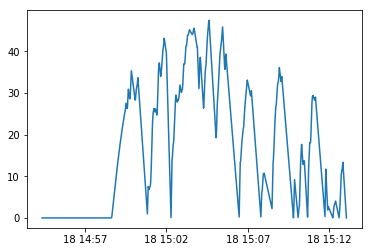

In [26]:
plt.plot(data1[0]) #展示第一个运动学片段

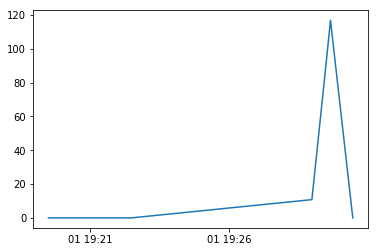

In [27]:
plt.plot(data2[0])

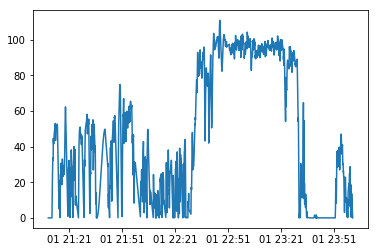

In [28]:
plt.plot(data3[0])

In [29]:
len(data1),len(data2),len(data3)

(130, 61, 56)

In [30]:
a = [1,2,3,4,6,8,14,16,19,20,21,24,25,26,32,36,37,39,40,44,46,49,50,53,56,58,60,61,62,69,72,75,76,77,85,85,87,90,93,98,99,100,104,105,106,110,111,112,114,117,118,119,120]
b = [0,2,3,4,7,8,9,10,12,13,14,15,16,17,18,19,25,26,28,32,33,35,38,47,52,53,54,56,58]
c =[1,2,3,7,8,9,10,12,14,15,16,17,20,26,27,29,31,34,36,42,46,47,48,49,50,54]

In [31]:
count = 0
for i in range(len(a)) :
    data1.pop(a[i]-count)
    count+=1

In [32]:
count = 0
for i in range(len(b)) :
    data2.pop(b[i]-count)
    count+=1

In [33]:
count = 0
for i in range(len(c)) :
    data3.pop(c[i]-count)
    count+=1

In [34]:
len(data1),len(data2),len(data3)

(77, 32, 30)

 # 汽车行驶工况的构建

## DTW（动态时间规整）

- 把不同长度的运动学片段长度变为一样

In [35]:
houxuan = []
for i in range(len(data1)) :
    if len(data1[i]) >1200 and len(data1[i]<1300) :
        houxuan.append(i)
houxuan

[1,
 3,
 5,
 9,
 17,
 18,
 19,
 32,
 37,
 39,
 40,
 41,
 47,
 55,
 59,
 60,
 63,
 64,
 66,
 68,
 70,
 71,
 72]

In [37]:
len(data1[70])

1211

In [38]:
from dtw import dtw
# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
df1 = []
x = data1[70]
for i in data1:
    y = i
    dist, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
    a0 = []
    b0 = []  
    lspath = path[0]    
    for j in range(len(lspath)):
         a0.append(path[0][j])
         #v =  path[i][1]
         b0.append(y[path[1][j]])
    route = pd.concat([pd.DataFrame(a0,columns =['A'] ),pd.DataFrame(b0,columns =['B'])],axis = 1)
    change_s2 = route.groupby('A').mean()
    change_s2 = change_s2.iloc[:,-1]
    df1.append(change_s2.tolist())

In [39]:
from dtw import dtw
# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
df2 = []
x = data1[70]
for i in data2:
    y = i
    dist, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
    a0 = []
    b0 = []  
    lspath = path[0]    
    for j in range(len(lspath)):
         a0.append(path[0][j])
         #v =  path[i][1]
         b0.append(y[path[1][j]])
    route = pd.concat([pd.DataFrame(a0,columns =['A'] ),pd.DataFrame(b0,columns =['B'])],axis = 1)
    change_s2 = route.groupby('A').mean()
    change_s2 = change_s2.iloc[:,-1]
    df2.append(change_s2.tolist())

In [40]:
from dtw import dtw
# Here, we use L2 norm as the element comparison distance
l2_norm = lambda x, y: (x - y) ** 2
df3 = []
x = data1[70]
for i in data3:
    y = i
    dist, cost_matrix, acc_cost_matrix, path = dtw(x, y, dist=l2_norm)
    a0 = []
    b0 = []  
    lspath = path[0]    
    for j in range(len(lspath)):
         a0.append(path[0][j])
         #v =  path[i][1]
         b0.append(y[path[1][j]])
    route = pd.concat([pd.DataFrame(a0,columns =['A'] ),pd.DataFrame(b0,columns =['B'])],axis = 1)
    change_s2 = route.groupby('A').mean()
    change_s2 = change_s2.iloc[:,-1]
    df3.append(change_s2.tolist())

In [41]:
data1 = pd.DataFrame(df1)
data2 = pd.DataFrame(df2)
data3 = pd.DataFrame(df3)

In [42]:
data1.to_excel('1.xlsx')
data2.to_excel('2.xlsx')
data3.to_excel('3.xlsx')

In [43]:
data = pd.concat([data1, data2,data3], axis=0)

# K-means聚类

# 若干个相同长度的运动学片段聚一类，聚类中心就是一条能体现参与数据采集汽车行驶特征的汽车行驶工况曲线（1200-1300秒），

In [44]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans  # KMeans模块
import matplotlib.pyplot as plt  # 图形库
from sklearn import preprocessing

In [45]:
estimator = KMeans(n_clusters=1)#构造聚类器
estimator.fit(data)#聚类
label_pred = estimator.labels_ #获取聚类标签
centroids = estimator.cluster_centers_ #获取聚类中心
inertia = estimator.inertia_ # 获取聚类准则的总和
clusters = estimator.labels_.tolist()
test = pd.DataFrame(clusters)
test.to_csv('custer.csv')
print('{:*^60}'.format('聚类标签'))
print(label_pred)  #输出聚类标签
print('{:*^60}'.format('聚类中心'))
print(centroids)   #输出聚类中心

****************************聚类标签****************************
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
****************************聚类中心****************************
[[0.7469889  0.73602182 0.75841994 ... 8.10679786 9.71862227 0.91134705]]


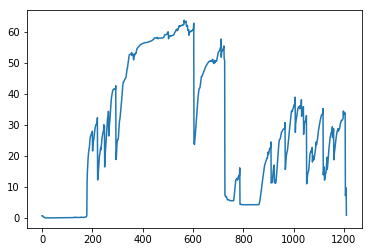

In [46]:
plt.plot(centroids[0])

In [47]:
centroids

array([[0.7469889 , 0.73602182, 0.75841994, ..., 8.10679786, 9.71862227,
        0.91134705]])

In [48]:
len(centroids[0])

1211